In [4]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./auto-mpg.csv') # takes in dataset
print(df.head(5)) # number of columns


    mpg  displacement  horsepower  weight  acceleration origin
0  18.0         307.0       130.0  3504.0          12.0    USA
1  15.0         350.0       165.0  3693.0          11.5    USA
2  18.0         318.0       150.0  3436.0          11.0    USA
3  16.0         304.0       150.0  3433.0          12.0    USA
4  17.0         302.0       140.0  3449.0          10.5    USA


    mpg  displacement  horsepower  weight  acceleration origin
0  18.0         307.0       130.0  3504.0          12.0    USA
1  15.0         350.0       165.0  3693.0          11.5    USA
2  18.0         318.0       150.0  3436.0          11.0    USA
3  16.0         304.0       150.0  3433.0          12.0    USA
4  17.0         302.0       140.0  3449.0          10.5    USA
 end 


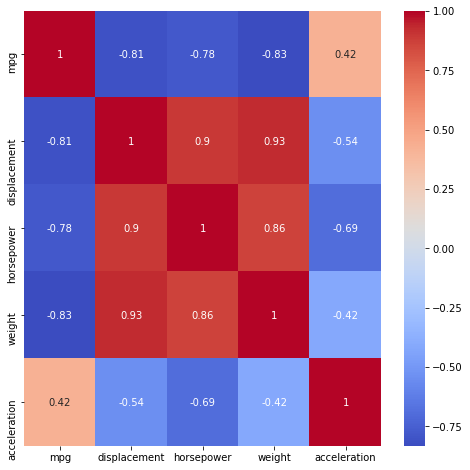

In [5]:
df.head(392) # number of columns
df.drop(columns = "origin") # drop column origin

df.corr().style.background_gradient(cmap='coolwarm') #correlation matrix

plt.figure(figsize=(8,8)) #create size of plot
sns.heatmap(df.corr(), annot=True, cmap="coolwarm") # create heatmap
print(' end ')

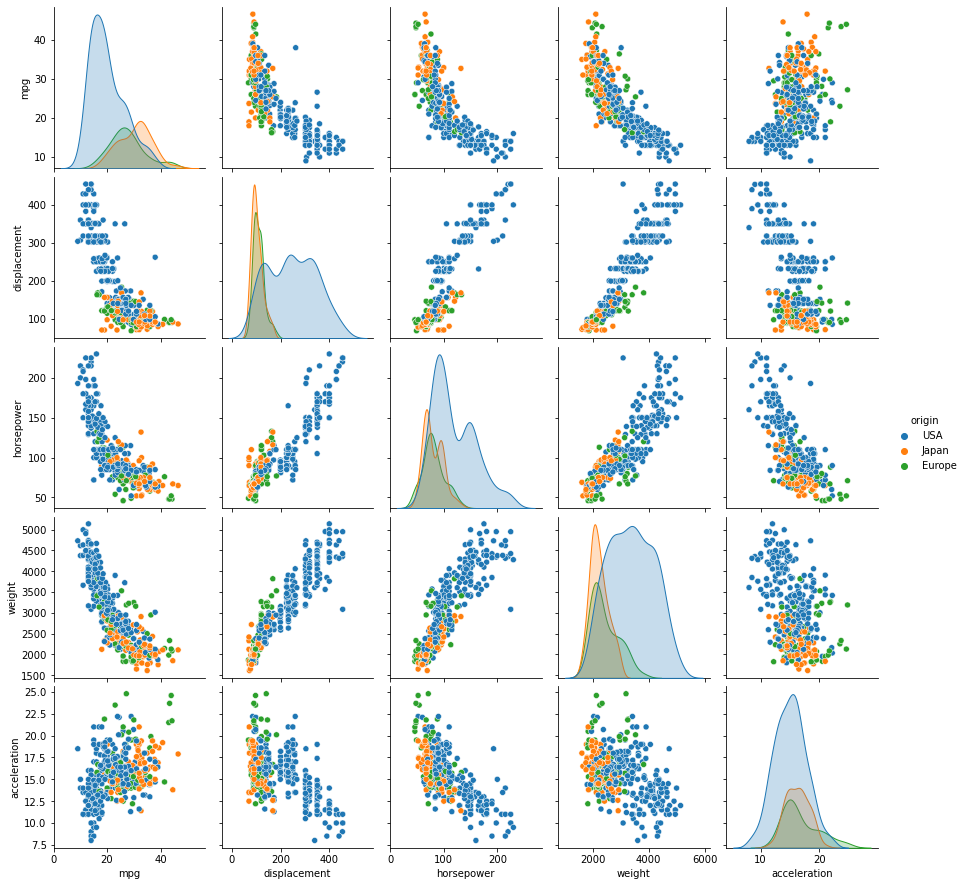

In [4]:
# Exercise 1.2: Pairplot

sns.pairplot(df, hue = 'origin')

# Question 1.2 Response: If we use horsepower to predict mpg, I would use polynomial regression to
# find the best performance since we know that the data for horsepower and data for mpg have correlation 
# with each other, so using a polynomial regression with 2 variables that are correlated will lead to
# minimum cost function.

In [6]:
# Exercise 2.1: Splitting Dataset
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2)

Model weights (m variable): 
[[-0.00721508]]
Model variable B
[44.97723028]
Linear Regression Equation:  y =  [[-0.00721508]] x +  [44.97723028]
Mean Squared Error (MSE) Training:  22.85805224041039
Mean Squared Error (MSE) Testing:  17.80863751498504


NameError: name 'mpg_pred' is not defined

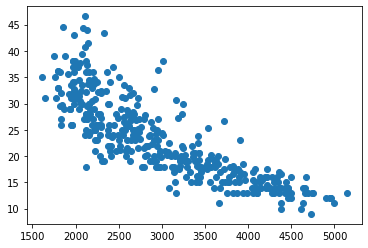

In [7]:
# Exercise 2.2: Simple Linear Regression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.metrics import mean_squared_error
weight = pd.DataFrame(df['weight']) # x variable used to predict mpg in linear regression model
mpg = pd.DataFrame(df['mpg'])  # y variable that is predicted by weight dataset in model
x_train, x_test,y_train,y_test = train_test_split(weight,mpg,test_size =0.8) # split dataset, training, testing
# x_train = takes 20% of (x) weight data to train/fit model
# x_test = takes 80% of  (x)  weight data to test model
# y_train = finds (y) values predicted by model
# y_test = tests accuracy of model
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
print("Model weights (m variable): ")
print(model.coef_)
print("Model variable B")
print(model.intercept_)
print("Linear Regression Equation: ", "y = ", model.coef_, "x + ", model.intercept_)
y_train_pred = model.predict(x_train) # predict y values for training set using x_train data
y_test_pred = model.predict(x_test) # predict y values for testing set using x_test data
training_mse = mean_squared_error(y_train, y_train_pred) 
testing_mse = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error (MSE) Training: ',training_mse)
print('Mean Squared Error (MSE) Testing: ',testing_mse)
plt.scatter(weight, mpg) #visualize the result
plt.plot(weight, mpg_pred, color = 'red')
plt.show()

In [54]:
# Exercise 2.3: Polynomial Regression Degree 2/3/4
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
x = weight # x = weight dataset
y = mpg    # y = mpg dataset
#---------  Spilt -----------
x_train, x_test,y_train,y_test = train_test_split(weight,mpg,test_size =0.8) # split dataset, training, testing
#---------  Train degree 2 -----------
reg_model = LinearRegression()
poly_2 = PolynomialFeatures(degree=2)
poly_2_x = poly_2.fit_transform(x_train) 
reg_model.fit(poly_2_x,y_train) #create pol reg degree2 
y_train_pred_2 = reg_model.predict(poly_2.fit_transform(x_train)) # predict y values for training set using x_train data
y_test_pred_2 = reg_model.predict(poly_2.fit_transform(x_test)) # predict y values for test set using x_train data
#---------  Train degree 3 -----------
reg_model = LinearRegression()
poly_3 = PolynomialFeatures(degree=3)
poly_3_x = poly_3.fit_transform(x_train) 
reg_model.fit(poly_3_x,y_train) #create pol reg degree3 
y_train_pred_3 = reg_model.predict(poly_3.fit_transform(x_train)) # predict y values for training set using x_train data
y_test_pred_3 = reg_model.predict(poly_3.fit_transform(x_test)) # predict y values for test set using x_train data
#---------  Train degree 4 -----------
reg_model = LinearRegression()
poly_4 = PolynomialFeatures(degree=4)
poly_4_x = poly_4.fit_transform(x_train) 
reg_model.fit(poly_4_x,y_train) #create pol reg degree4 
y_train_pred_4 = reg_model.predict(poly_4.fit_transform(x_train)) # predict y values for training set using x_train data
y_test_pred_4 = reg_model.predict(poly_4.fit_transform(x_test)) # predict y values for test set using x_test data
#----- cal MSE ------
model2_training_mse = mean_squared_error(y_train,y_train_pred_2) 
model2_testing_mse  = mean_squared_error(y_test,y_test_pred_2) 
model3_training_mse = mean_squared_error(y_train,y_train_pred_3) 
model3_testing_mse  = mean_squared_error(y_test,y_test_pred_3) 
model4_training_mse = mean_squared_error(y_train,y_train_pred_4) 
model4_testing_mse  = mean_squared_error(y_test,y_test_pred_4) 
#----- print MSE result ----
print('Pol 2 - Mean Squared Error (MSE) Training: ',model2_training_mse)
print('Pol 2 - Mean Squared Error (MSE) Testing : ',model2_testing_mse)
print('Pol 3 - Mean Squared Error (MSE) Training: ',model3_training_mse)
print('Pol 3 - Mean Squared Error (MSE) Testing : ',model3_testing_mse)
print('Pol 4 - Mean Squared Error (MSE) Training: ',model4_training_mse)
print('Pol 4 - Mean Squared Error (MSE) Testing : ',model4_testing_mse)


Pol 2 - Mean Squared Error (MSE) Training:  16.527215373497803
Pol 2 - Mean Squared Error (MSE) Testing :  18.55699779577849
Pol 3 - Mean Squared Error (MSE) Training:  16.492835563010694
Pol 3 - Mean Squared Error (MSE) Testing :  18.55343291143448
Pol 4 - Mean Squared Error (MSE) Training:  16.460448273961575
Pol 4 - Mean Squared Error (MSE) Testing :  18.55413164946937


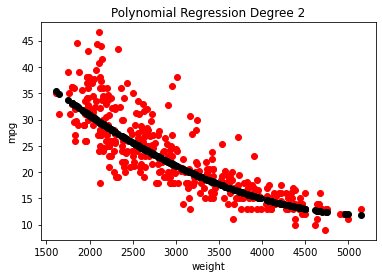

In [96]:
plt.title('Polynomial Regression Degree 2')
plt.xlabel('weight')
plt.ylabel('mpg')
#----- plot data ------
plt.scatter(x,y, color = 'red')
plt.scatter(x_test,y_test_pred_2,color = 'black')
plt.show()

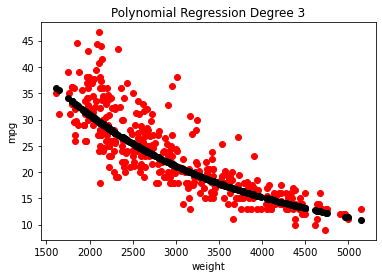

In [58]:

plt.title('Polynomial Regression Degree 3')
plt.xlabel('weight')
plt.ylabel('mpg')
#----- plot data ------
plt.scatter(x,y, color = 'red')
plt.scatter(x_test,y_test_pred_3,color = 'black')
plt.show()

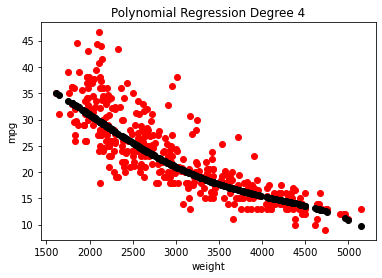

In [60]:
plt.title('Polynomial Regression Degree 4')
plt.xlabel('weight')
plt.ylabel('mpg')
#----- plot data ------
plt.scatter(x,y, color = 'red')
plt.scatter(x_test,y_test_pred_4,color = 'black')
plt.show()

In [123]:
#-------- Exercise 3 - Logistic Regression ----------------
# classify data when  'USA'  ==> 1  'Japan' ==> 0
df = df[df["origin"] != "Europe"] # remove all Europe records
df.head(20)


,mpg,displacement,horsepower,weight,acceleration,origin
0,18.0,307.0,130.0,3504.0,12.0,USA
1,15.0,350.0,165.0,3693.0,11.5,USA
2,18.0,318.0,150.0,3436.0,11.0,USA
3,16.0,304.0,150.0,3433.0,12.0,USA
4,17.0,302.0,140.0,3449.0,10.5,USA
5,15.0,429.0,198.0,4341.0,10.0,USA
6,14.0,454.0,220.0,4354.0,9.0,USA
7,14.0,440.0,215.0,4312.0,8.5,USA
8,14.0,455.0,225.0,4425.0,10.0,USA
9,15.0,390.0,190.0,3850.0,8.5,USA


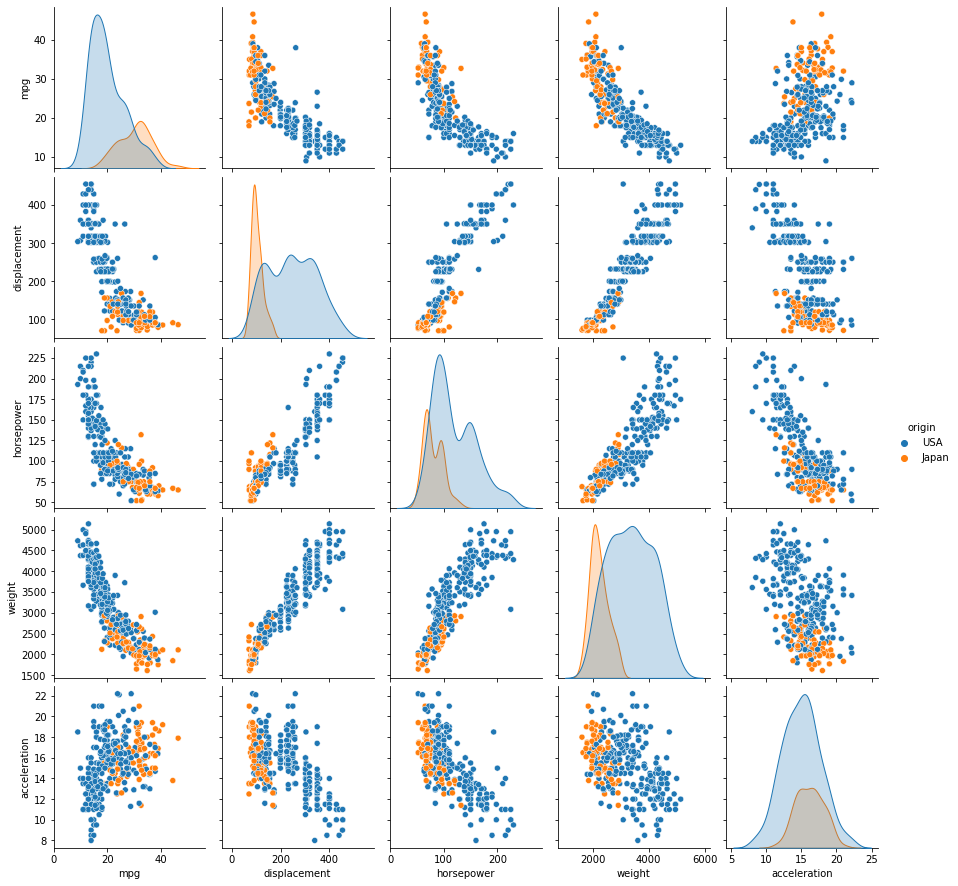

In [124]:
sns.pairplot(df, hue = 'origin')

In [126]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# create a mapping from vehicle class
df['class'] = df["origin"].apply(lambda x: 1 if x == 'USA' else 0)

df['class'].value_counts()

cars_new = df[['mpg','displacement','horsepower','weight','acceleration','class']] #delete 
cars_new.head(15)

#split the data into training and testing set with the ratio of 80:20.
train, test = train_test_split(cars_new, test_size=0.2, random_state=21)
print(test)
X_train, y_train = train.drop(columns=['class']), train['class']
X_test, y_test = test.drop(columns=['class']), test['class']
print('--- X_train ---')
print(X_train)
print('--- y_train ---')
print(y_train)

# You can try replace StandardScaler with other scalings such as MinMaxScaler()
# Or, you can also try not rescaling the data
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#print(X_train.shape, X_test.shape)



      mpg  displacement  horsepower  weight  acceleration  class
268  21.1         134.0        95.0  2515.0          14.8      0
123  11.0         350.0       180.0  3664.0          11.0      1
161  18.0         225.0        95.0  3785.0          19.0      1
90   13.0         400.0       150.0  4464.0          12.0      1
106  18.0         232.0       100.0  2789.0          15.0      1
..    ...           ...         ...     ...           ...    ...
63   15.0         318.0       150.0  4135.0          13.5      1
125  19.0         232.0       100.0  2901.0          16.0      1
168  23.0         140.0        78.0  2592.0          18.5      1
6    14.0         454.0       220.0  4354.0           9.0      1
52   31.0          71.0        65.0  1773.0          19.0      0

[65 rows x 6 columns]
--- X_train ---
      mpg  displacement  horsepower  weight  acceleration
138  14.0         304.0       150.0  4257.0          15.5
56   24.0         113.0        95.0  2278.0          15.5
163  20

In [104]:
class ScratchLogisticRegression:
    def __init__(self, epoch_num=100, learning_rate=0.005, verbose=False, solver='SGD'):
        self.verbosity = verbose
        self.solver = solver
        # Training data
        self.X = None
        self.y = None
        # Coefficients
        self.w = None
        # Hyperparameters
        self.lr = learning_rate
        self.epochs = epoch_num
        # Tracking the training process
        self.log = []
        
    def sigmoid(self, x):
        return 1/(1+np.exp(-(np.dot(x, self.w))))
    
    def fit(self, X, y):
        self.X = np.asarray(X)
        self.y = np.asarray(y)
        self.N = self.X.shape[0]
        self.w = np.zeros(X.shape[1]) # Initialize weights/coefficients with the Number of features
        # Based on our code, the dataframe index would be the epochs, so we do not need to record it
        self.log.append({'Loss': self.computeLoss(self.X, self.y)})
        
        # Note that I didn't do early stopping to prevent overfitting
        for epoch in range(self.epochs):
            # verbose
            if(epoch % 20 == 0 and self.verbosity): print(f'Epoch {epoch}: current training loss is {self.computeLoss(self.X, self.y)}')
            if self.solver == 'SGD': 
                self.SGD()
            else: 
                self.Newton()
            self.log.append({'Loss': self.computeLoss(self.X, self.y)})
        print(f'Epoch {self.epochs}: current training loss is {self.computeLoss(self.X, self.y)}')
        
    def SGD(self):
        for idx in range(self.N): 
            obs = self.X[idx]
            y_obs = self.y[idx]
            y_hat = self.sigmoid(obs)
            
            gradient = np.dot((y_obs - y_hat), obs)
            # Equivalent: gradient = (y_obs - y_hat)*obs 
            
            update = self.w + self.lr * gradient
            self.w = update
            
    def Newton(self):
        # These consider all training instances
        obs = self.X
        Y_obs = self.y
        Y_hat = self.sigmoid(obs)
        
        first_derivative = np.dot((Y_obs - Y_hat), obs) 
        second_derivative = np.dot((np.ones(Y_hat.shape) - Y_hat) * Y_hat, obs**2) 
        
        update = self.w + self.lr * (first_derivative / second_derivative)
        self.w = update
        
    def computeLoss(self, x, y):
        y_hat = self.sigmoid(x)
        loss = -y*np.log(y_hat) -(1-y)*np.log(1-y_hat)
        return np.round(np.mean(loss), 3)
    
    def predict(self, x):
        # 1 if self.sigmoid(x) is over 0.5; 0, otherwise.
        return np.around(self.sigmoid(x)).astype(int)
    
    # Note this is different from the .score() on scikit-learn
    def score(self, x):
        return np.dot(x, self.w)
    
    def getLog(self):
        return pd.DataFrame(self.log)
    
    def getParams(self):
        return self.w.reshape(1, -1).T
    
    

In [127]:
from sklearn.metrics import accuracy_score

print('Basic Logistic Regression with SGD \n')
lor_sgd = ScratchLogisticRegression(verbose=True, learning_rate=0.005, solver='SGD')

lor_sgd.fit(X_train, y_train)

print(f'Testing error is: {lor_sgd.computeLoss(X_test, y_test)}\n')
print(f'Training prediction accuracy is {accuracy_score(y_train, lor_sgd.predict(X_train))}')
print(f'Testing prediction accuracy is {accuracy_score(y_test, lor_sgd.predict(X_test))}')

Basic Logistic Regression with SGD 

Epoch 0: current training loss is 0.693
Epoch 20: current training loss is 0.547
Epoch 40: current training loss is 0.542
Epoch 60: current training loss is 0.54
Epoch 80: current training loss is 0.538
Epoch 100: current training loss is 0.538
Testing error is: 0.461

Training prediction accuracy is 0.749034749034749
Testing prediction accuracy is 0.8461538461538461


In [128]:
print('Basic Logistic Regression with Newton\'s Method \n')
lor_new = ScratchLogisticRegression(verbose=True, learning_rate=0.005, solver='Newton')

lor_new.fit(X_train, y_train)

print(f'Testing error is: {lor_new.computeLoss(X_test, y_test)}\n')
print(f'Training prediction accuracy is {accuracy_score(y_train, lor_new.predict(X_train))}')
print(f'Testing prediction accuracy is {accuracy_score(y_test, lor_new.predict(X_test))}')

Basic Logistic Regression with Newton's Method 

Epoch 0: current training loss is 0.693
Epoch 20: current training loss is 0.638
Epoch 40: current training loss is 0.609
Epoch 60: current training loss is 0.594
Epoch 80: current training loss is 0.584
Epoch 100: current training loss is 0.578
Testing error is: 0.522

Training prediction accuracy is 0.7104247104247104
Testing prediction accuracy is 0.7846153846153846


In [129]:
class RegularizedLogisticRegression:
    def __init__(self, epoch_num=100, learning_rate=0.05, verbose=False, solver='SGD', reg_mode='none', reg=0.2):
        self.verbosity = verbose
        self.solver = solver
        self.reg_modes = ['l1', 'l2', 'none']
        # Training data
        self.X = None
        self.y = None
        # Coefficients
        self.w = None
        # Hyperparameters
        self.lr = learning_rate
        self.epochs = epoch_num
        if (reg_mode not in self.reg_modes) or reg_mode == 'none' or solver != 'SGD':
            self.reg_mode = 'none'
            self.reg = 0
        else:
            self.reg_mode = reg_mode
            self.reg = reg
        # Tracking the training process
        self.log = []
        
    def sigmoid(self, x):
        return 1/(1+np.exp(-(np.dot(x, self.w))))
    
    def fit(self, X, y):
        self.X = np.asarray(X)
        self.y = np.asarray(y)
        self.N = self.X.shape[0]
        self.w = np.zeros(X.shape[1]) # Initialize weights/coefficients with the Number of features
        # Based on our code, the dataframe index would be the epochs, so we do not need to record it
        self.log.append({'Loss': self.computeLoss(self.X, self.y)})
        
        for epoch in range(self.epochs):
            # verbose
            if(epoch % 20 == 0 and self.verbosity): print(f'Epoch {epoch}: current training loss is {self.computeLoss(self.X, self.y)}')
            if self.solver == 'SGD': 
                self.SGD()
            else: 
                self.Newton()
            self.log.append({'Loss': self.computeLoss(self.X, self.y)})
        print(f'Epoch {self.epochs}: current training loss is {self.computeLoss(self.X, self.y)}')
        
    def SGD(self):
        for idx in range(self.N): 
            obs = self.X[idx]
            y_obs = self.y[idx]
            y_hat = self.sigmoid(obs)

            # This is for all weights
            if self.reg_mode == 'none':
                gradient = (y_obs - y_hat)*obs 
            elif self.reg_mode == 'l1':
                gradient = (y_obs - y_hat)*obs - self.reg*np.sign(self.w)
            elif self.reg_mode == 'l2':
                gradient = (y_obs - y_hat)*obs - 2*self.reg*self.w
                
            update = self.w + self.lr*gradient
            
            self.w = update
            
    def Newton(self):
        # These consider all training instances
        obs = self.X
        Y_obs = self.y
        Y_hat = self.sigmoid(obs)
        
        first_derivative = np.dot((Y_obs - Y_hat), obs) 
        second_derivative = np.dot((np.ones(Y_hat.shape) - Y_hat) * Y_hat, obs**2) 

        update = self.w + self.lr * (first_derivative / second_derivative)
        self.w = update
        
    def computeLoss(self, x, y):
        y_hat = self.sigmoid(x)
        if self.reg_mode == 'none':
            reg_loss = 0
        elif self.reg_mode == 'l1':
            reg_loss = self.reg * np.sum(np.abs(self.w))
        elif self.reg_mode == 'l2':
            reg_loss = self.reg * np.sum(np.square(self.w))
            
        loss = - y*np.log(y_hat) - (1-y)*np.log(1-y_hat)
        return np.round(np.mean(loss) + reg_loss, 3)
    
    def predict(self, x):
        # 1 if self.sigmoid(x) is over 0.5; 0, otherwise.
        return np.around(self.sigmoid(x)).astype(int)
    
    def score(self, x):
        return np.dot(x, self.w)
    
    def getLog(self):
        return pd.DataFrame(self.log)
    
    def getParams(self):
        return self.w.reshape(-1, 1).T
    

In [130]:
print('l2-regularized Logistic Regression with SGD \n')

lor_l2 = RegularizedLogisticRegression(verbose=True, reg_mode='l2', reg=0.2, solver='SGD')
lor_l2.fit(X_train, y_train)

print(f'Testing error is: {lor_l2.computeLoss(X_test, y_test)}\n')

print(f'Training prediction accuracy is {accuracy_score(y_train, lor_l2.predict(X_train))}')
print(f'Testing prediction accuracy is {accuracy_score(y_test, lor_l2.predict(X_test))}')

l2-regularized Logistic Regression with SGD 

Epoch 0: current training loss is 0.693
Epoch 20: current training loss is 0.636
Epoch 40: current training loss is 0.636
Epoch 60: current training loss is 0.636
Epoch 80: current training loss is 0.636
Epoch 100: current training loss is 0.636
Testing error is: 0.617

Training prediction accuracy is 0.7374517374517374
Testing prediction accuracy is 0.8153846153846154


In [131]:
print('l1-regularized Logistic Regression with SGD \n')

lor_l1 = RegularizedLogisticRegression(verbose=True, reg_mode='l1', reg=0.2, solver='SGD')
lor_l1.fit(X_train, y_train)

print(f'Testing error is: {lor_l1.computeLoss(X_test, y_test)}\n')

print(f'Training prediction accuracy is {accuracy_score(y_train, lor_l1.predict(X_train))}')
print(f'Testing prediction accuracy is {accuracy_score(y_test, lor_l1.predict(X_test))}')

l1-regularized Logistic Regression with SGD 

Epoch 0: current training loss is 0.693
Epoch 20: current training loss is 0.692
Epoch 40: current training loss is 0.692
Epoch 60: current training loss is 0.693
Epoch 80: current training loss is 0.694
Epoch 100: current training loss is 0.693
Testing error is: 0.689

Training prediction accuracy is 0.7142857142857143
Testing prediction accuracy is 0.7692307692307693


In [135]:
#display(pd.DataFrame(lor_l1.getParams(), columns=df.columns[:-1]))
print('l1-regularized Logistic Regression with SGD \n')

lor_l1 = RegularizedLogisticRegression(verbose=True, reg_mode='l1', reg=0.2, solver='SGD')
lor_l1.fit(X_train, y_train)

print(f'Testing error is: {lor_l1.computeLoss(X_test, y_test)}\n')

print(f'Training prediction accuracy is {accuracy_score(y_train, lor_l1.predict(X_train))}')
print(f'Testing prediction accuracy is {accuracy_score(y_test, lor_l1.predict(X_test))}')

l1-regularized Logistic Regression with SGD 

Epoch 0: current training loss is 0.693
Epoch 20: current training loss is 0.692
Epoch 40: current training loss is 0.692
Epoch 60: current training loss is 0.693
Epoch 80: current training loss is 0.694
Epoch 100: current training loss is 0.693
Testing error is: 0.689

Training prediction accuracy is 0.7142857142857143
Testing prediction accuracy is 0.7692307692307693


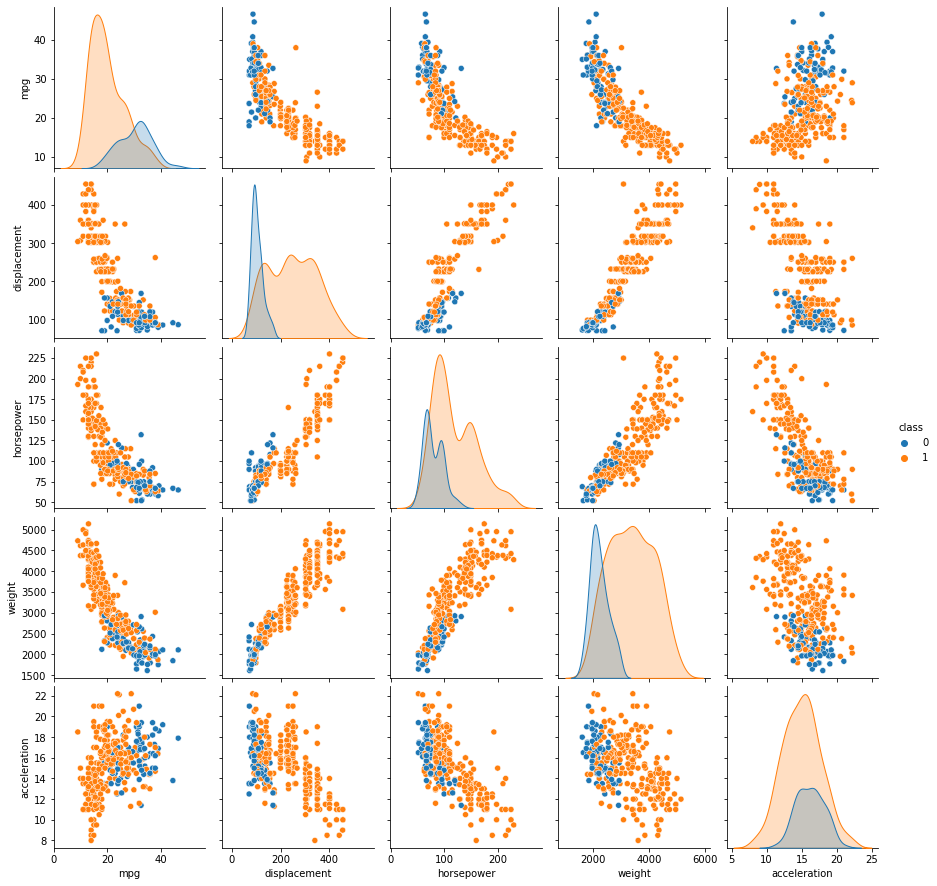

In [136]:
_ = sns.pairplot(df, hue='class')

75 mispredictions out of 259 attempts


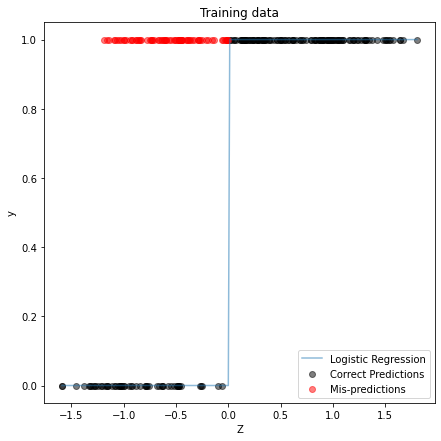

14 mispredictions out of 65 attempts


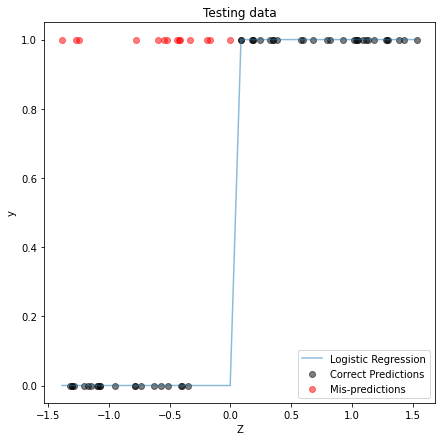

In [137]:
import matplotlib.pyplot as plt
def plotLogistic(x, y, model, figsize=7, title='Training data'):
    plt.figure(figsize=(figsize,figsize))
    pred = x[(model.predict(x) == y), :]
    misPred = x[(model.predict(x) != y), :]
    print(f'{misPred.shape[0]} mispredictions out of {x.shape[0]} attempts')

    plt.scatter(model.score(pred), model.predict(pred), color='k', alpha=.5)
    if misPred.shape[0] > 0:
        plt.scatter(model.score(misPred), 1 - model.predict(misPred), color='r', alpha=.5) # Plot ground truth

    line = sorted(zip(model.score(x), model.predict(x)))
    line_x, line_y = zip(*line)
    plt.plot(line_x, line_y, color='tab:blue', alpha=.5)

    plt.xlabel("Z")
    plt.ylabel("y")
    plt.legend(['Logistic Regression', 'Correct Predictions', 'Mis-predictions'])
    plt.title(title)
    plt.show()

plotLogistic(X_train, y_train, lor_new)
plotLogistic(X_test, y_test, lor_new, title='Testing data')

In [138]:
from sklearn.metrics import classification_report
print(classification_report(y_train, lor_new.predict(X_train)))
print(classification_report(y_test, lor_new.predict(X_test)))

              precision    recall  f1-score   support

           0       0.44      1.00      0.61        58
           1       1.00      0.63      0.77       201

    accuracy                           0.71       259
   macro avg       0.72      0.81      0.69       259
weighted avg       0.87      0.71      0.73       259

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        21
           1       1.00      0.68      0.81        44

    accuracy                           0.78        65
   macro avg       0.80      0.84      0.78        65
weighted avg       0.87      0.78      0.79        65



In [139]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty='none', max_iter=1000, solver='newton-cg').fit(X_train, y_train)
print(classification_report(y_train, lor.predict(X_train)))
print(classification_report(y_test, lor.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        58
           1       0.93      0.92      0.93       201

    accuracy                           0.89       259
   macro avg       0.84      0.85      0.84       259
weighted avg       0.89      0.89      0.89       259

              precision    recall  f1-score   support

           0       0.81      0.62      0.70        21
           1       0.84      0.93      0.88        44

    accuracy                           0.83        65
   macro avg       0.82      0.78      0.79        65
weighted avg       0.83      0.83      0.82        65



29 mispredictions out of 259 attempts


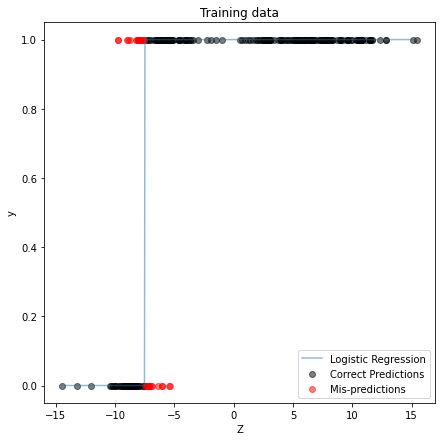

11 mispredictions out of 65 attempts


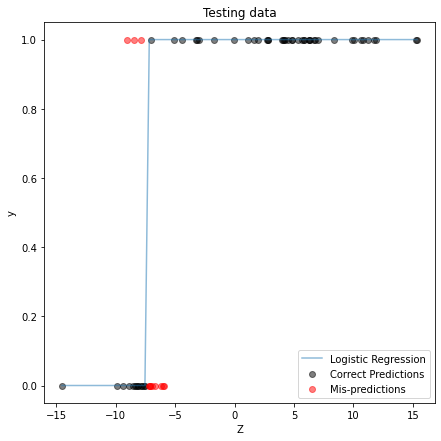

In [140]:
def plotSKLogistic(x, y, model, figsize=7, title='Training data'):
    plt.figure(figsize=(figsize,figsize))
    pred = x[(model.predict(x) == y), :]
    misPred = x[(model.predict(x) != y), :]
    print(f'{misPred.shape[0]} mispredictions out of {x.shape[0]} attempts')

    plt.scatter(np.dot(pred, model.coef_.T), model.predict(pred), color='k', alpha=.5)
    if misPred.shape[0] > 0:
        plt.scatter(np.dot(misPred, model.coef_.T), 1 - model.predict(misPred), color='r', alpha=.5) # Plot ground truth

    line = sorted(zip(np.dot(x, model.coef_.T), model.predict(x)))
    line_x, line_y = zip(*line)
    plt.plot(line_x, line_y, color='tab:blue', alpha=.5)

    plt.xlabel("Z")
    plt.ylabel("y")
    plt.legend(['Logistic Regression', 'Correct Predictions', 'Mis-predictions'])
    plt.title(title)
    plt.show()

plotSKLogistic(X_train, y_train, lor)
plotSKLogistic(X_test, y_test, lor, title='Testing data')